<a href="https://colab.research.google.com/github/afrin-afia/AIMSS_python_workshop_2023/blob/main/code/pythonLibraries_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Classification of iris flowers using Keras library
#load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical


In [ ]:
#load dataset
iris_dataframe= sns.load_dataset('iris')                                    #we could load the dataset from a local csv file/sklearn library also
#iris_dataframe.info()
iris_dataframe= iris_dataframe.sample(frac=1)   #shuffle the data. 
iris_dataframe['species'].unique()

array(['versicolor', 'setosa', 'virginica'], dtype=object)

In [ ]:
#preprocess data
#replace target values with numbers. Note: Assign from 0, we need it to start from 0 (explanation in next cell)
iris_dataframe=iris_dataframe.replace(to_replace="setosa",value=0)
iris_dataframe=iris_dataframe.replace(to_replace="versicolor",value=1)
iris_dataframe=iris_dataframe.replace(to_replace="virginica",value=2)
iris_dataframe.head()

,sepal_length,sepal_width,petal_length,petal_width,species
59,5.2,2.7,3.9,1.4,1
36,5.5,3.5,1.3,0.2,0
71,6.1,2.8,4.0,1.3,1
28,5.2,3.4,1.4,0.2,0
34,4.9,3.1,1.5,0.2,0


In [ ]:
#seperate features (X) and outputs (Y)
Y= iris_dataframe['species']
X= iris_dataframe.drop(['species'], axis=1)
#df to array
X= X.to_numpy()
Y= Y.to_numpy()

#class= 0,1,2 do not have any meaning, they just represent three different classes. So, we should use one-hot encoding to represent classes
Y= to_categorical(Y)        #keras's to_categorical() function needs integer-classes to start from 0



#print(X)
#print(type(X))
#print(Y)

In [ ]:
#split data into train and test dataset
train_proportion= .8      #80% data for training, 20% for testing
train_len= int(train_proportion * len(X))   #len(2d_array) is #rows in that array
train_x= X[0:train_len, :]
train_y= Y[0:train_len, :]
test_x= X[train_len:, :]
test_y= Y[train_len:, :]
print(train_x.shape)
print(test_x.shape)

(120, 4)
(30, 4)


In [ ]:
#write a function that defines our neural network model and returns it
def create_model(ip_dim, op_dim):
  model= Sequential()
  model.add (Dense(20, input_dim=ip_dim, activation='relu'))
  model.add (Dense(15, activation='relu'))           #relu= rectified linear unit is the most used activation for hidden layers
  model.add (Dense(10, activation='relu')) 
  model.add (Dense(op_dim, activation='softmax'))   #softmax returns values in [0,1] that sum up to 1. Thus, it assigns probabilities to each class

  #now compile the model
  model.compile(loss='categorical_crossentropy', metrics=['accuracy'])
  return model


In [ ]:
#get input and output dimension
num_features= X.shape[1]    # #columns in X
num_classes= Y.shape[1]     #Y is an array of one-hot encoded vectors. Each vector's size is #classes
#print(num_features)
#print(num_classes)
mymodel= create_model(num_features, num_classes)
print(mymodel.summary())

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 20)                100       
                                                                 
 dense_29 (Dense)            (None, 15)                315       
                                                                 
 dense_30 (Dense)            (None, 10)                160       
                                                                 
 dense_31 (Dense)            (None, 3)                 33        
                                                                 
Total params: 608
Trainable params: 608
Non-trainable params: 0
_________________________________________________________________
None


In [86]:

#train the model
fit_history=mymodel.fit(train_x, train_y, batch_size=20, epochs=50)



Epoch 1/50
6/6 [==============================] - 0s 5ms/step - loss: 0.2799 - accuracy: 0.9667
Epoch 2/50
6/6 [==============================] - 0s 4ms/step - loss: 0.2673 - accuracy: 0.9833
Epoch 3/50
6/6 [==============================] - 0s 3ms/step - loss: 0.2620 - accuracy: 0.9667
Epoch 4/50
6/6 [==============================] - 0s 3ms/step - loss: 0.2594 - accuracy: 0.9667
Epoch 5/50
6/6 [==============================] - 0s 3ms/step - loss: 0.2479 - accuracy: 0.9667
Epoch 6/50
6/6 [==============================] - 0s 2ms/step - loss: 0.2437 - accuracy: 0.9667
Epoch 7/50
6/6 [==============================] - 0s 3ms/step - loss: 0.2444 - accuracy: 0.9583
Epoch 8/50
6/6 [==============================] - 0s 3ms/step - loss: 0.2317 - accuracy: 0.9667
Epoch 9/50
6/6 [==============================] - 0s 3ms/step - loss: 0.2350 - accuracy: 0.9667
Epoch 10/50
6/6 [==============================] - 0s 2ms/step - loss: 0.2177 - accuracy: 0.9833
Epoch 11/50
6/6 [======================

In [87]:
#evaluate the model
metrics= mymodel.evaluate(test_x, test_y)
print(f'Loss on test data: {metrics[0]}')
print(f'Accuracy on test data: {metrics[1]}')

1/1 [==============================] - 0s 20ms/step - loss: 0.0521 - accuracy: 1.0000
Loss on test data: 0.052056942135095596
Accuracy on test data: 1.0


In [ ]:
print(fit_history.history)

{'loss': [1.2217258214950562, 1.155988097190857, 1.127820372581482, 1.1017411947250366, 1.0747883319854736, 1.049040675163269, 1.0231270790100098, 1.0057536363601685, 0.986831545829773, 0.9706172943115234, 0.9543291330337524, 0.9404652714729309, 0.9219951629638672, 0.9062246680259705, 0.8911916017532349, 0.8697054386138916, 0.8475752472877502, 0.8260692358016968, 0.8033644556999207, 0.7776938080787659, 0.7538453936576843, 0.7305728793144226, 0.7038496136665344, 0.6760654449462891, 0.6504179239273071, 0.6299184560775757, 0.6030184626579285, 0.5836142301559448, 0.5601180195808411, 0.5391271114349365, 0.5223502516746521, 0.49962806701660156, 0.48430633544921875, 0.4658244848251343, 0.4483259916305542, 0.4386815130710602, 0.4241679012775421, 0.4117238223552704, 0.3978373110294342, 0.3852790296077728, 0.3701688349246979, 0.3612891137599945, 0.3522244989871979, 0.34464675188064575, 0.33071276545524597, 0.3190153241157532, 0.3061997592449188, 0.300702840089798, 0.30281326174736023, 0.28823903

Text(0, 0.5, 'Accuracy')

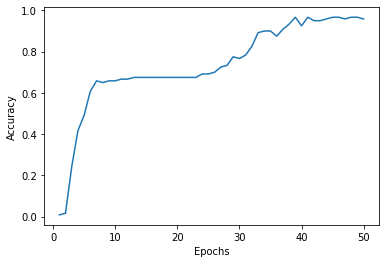

In [ ]:
#draw accuracy graph


x_values= np.arange(1,51)
y_values= fit_history.history['accuracy']
myplot= sns.lineplot(x=x_values, y=y_values)
myplot.set_xlabel('Epochs')
myplot.set_ylabel('Training Accuracy')